**Prática de Suavização de Imagens**

(filtro passa baixa)

Exercícios retirados de:
http://homepages.inf.ed.ac.uk/rbf/HIPR2/mean.htm

http://homepages.inf.ed.ac.uk/rbf/HIPR2/gsmooth.htm

http://homepages.inf.ed.ac.uk/rbf/HIPR2/median.htm

1)	Aplique o filtro de Média a imagem abaixo para diferentes tamanhos de máscaras.
- 3x3; 7x7; 3x3 aplicado três vezes sequenciais.

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

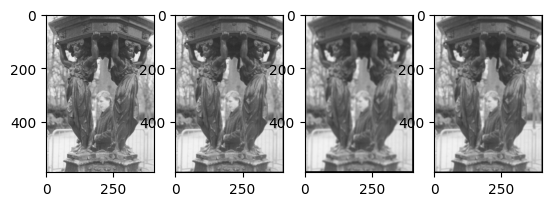

In [5]:
# code here

img1 = cv2.imread("sta2.png", cv2.IMREAD_GRAYSCALE)

# Definição da máscara de tamanho 3x3
kernel_3 = np.ones((3, 3), np.float32) / 9

# Definição da máscara de tamanho 7x7
kernel_7 = np.ones((7, 7), np.float32) / 49

# Função para aplicar o filtro de média manualmente
def media(img1, kernel):
    # Obtém as dimensões da imagem e do kernel
    img_height, img_width = img1.shape
    kernel_height, kernel_width = kernel.shape

    # Calcula o deslocamento do kernel
    d_h = kernel_height // 2
    d_w = kernel_width // 2

    # Cria uma imagem vazia para armazenar o resultado
    img_filtrada = np.zeros((img_height, img_width), dtype=np.uint8)

    # Aplica o filtro de média percorrendo a imagem pixel a pixel
    for i in range(d_h, img_height - d_h):
        for j in range(d_w, img_width - d_w):
            # Calcula a média dos valores dos pixels na vizinhança do pixel atual
            soma = 0
            for k in range(kernel_height):
                for l in range(kernel_width):
                    soma += img1[i + k - d_h, j + l - d_w]
            media = soma // (kernel_height * kernel_width)

            # Define o valor do pixel na imagem filtrada como a média calculada
            img_filtrada[i, j] = media

    return img_filtrada

# Aplicação do filtro de média manualmente para a máscara de tamanho 3x3
img_media_3 = media(img1, kernel_3)

# Aplicação do filtro de média manualmente para a máscara de tamanho 7x7
img_media_7 = media(img1, kernel_7)

# Aplicação do filtro de média manualmente para a máscara de tamanho 3x3 aplicado três vezes sequenciais
img_media_3x3 = media(media(media(img1, kernel_3), kernel_3), kernel_3)

# Exibição da imagem original e as imagens filtradas lado a lado)
fig, ax = plt.subplots(1, 4)
ax[0].imshow(img1, cmap='gray', vmin=0, vmax=255)
ax[1].imshow(img_media_3, cmap='gray', vmin=0, vmax=255)
ax[2].imshow(img_media_7, cmap='gray', vmin=0, vmax=255)
ax[3].imshow(img_media_3x3, cmap='gray', vmin=0, vmax=255)
plt.show()


2)	Aplique o filtro Gaussiano à imagem abaixo para diferentes valores de desvio padrão (σ) e tamanho de máscara.
- σ = 1.0 (kernel size 5×5).	σ = 2.0 (kernel size 9×9).	σ =  4.0 (kernel size 15×15).

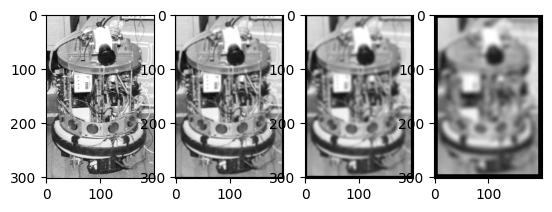

In [6]:
#  code here
img2 = cv2.imread("ben2.png", cv2.IMREAD_GRAYSCALE)

def gaussian_kernel(size, sigma):
    
    #Retorna um kernel gaussiano de tamanho size x size e desvio padrão sigma.
    
    kernel = np.zeros((size, size))
    center = size // 2
    for i in range(size):
        for j in range(size):
            x = i - center
            y = j - center
            kernel[i, j] = np.exp(-(x ** 2 + y ** 2) / (2 * sigma ** 2))
    kernel = kernel / np.sum(kernel)
    return kernel

def gaussian_filter(img, kernel_size, sigma):
    
    #Aplica o filtro Gaussiano na imagem img com tamanho de kernel kernel_size e desvio padrão sigma.
    height, width = img.shape
    # Cria uma imagem vazia para armazenar o resultado
    filtered_img = np.zeros((height, width), dtype=np.uint8)
    # Obtém o kernel gaussiano correspondente
    kernel = gaussian_kernel(kernel_size, sigma)
    # Aplica a convolução da imagem com o kernel gaussiano
    for i in range(kernel_size // 2, height - kernel_size // 2):
        for j in range(kernel_size // 2, width - kernel_size // 2):
            # Seleciona uma submatriz da imagem com o mesmo tamanho do kernel
            subimg = img[i - kernel_size // 2:i + kernel_size // 2 + 1, j - kernel_size // 2:j + kernel_size // 2 + 1]
            # Realiza a convolução da submatriz com o kernel
            filtered_value = np.sum(subimg * kernel)
            # Define o valor do pixel na imagem filtrada como o resultado da convolução
            filtered_img[i, j] = int(filtered_value)
    return filtered_img


# Aplica o filtro Gaussiano para sigma=1 e tamanho de kernel 5x5
filtered_img_1_5 = gaussian_filter(img2, 5, 1)

# Aplica o filtro Gaussiano para sigma=2 e tamanho de kernel 9x9
filtered_img_2_9 = gaussian_filter(img2, 9, 2)

# Aplica o filtro Gaussiano para sigma=4 e tamanho de kernel 15x15
filtered_img_4_15 = gaussian_filter(img2, 15, 4)

fig, ax = plt.subplots(1, 4)
ax[0].imshow(img2, cmap='gray', vmin=0, vmax=255)
ax[1].imshow(filtered_img_1_5, cmap='gray', vmin=0, vmax=255)
ax[2].imshow(filtered_img_2_9, cmap='gray', vmin=0, vmax=255)
ax[3].imshow(filtered_img_4_15, cmap='gray', vmin=0, vmax=255)
plt.show()

3)	Aplique o filtro de Mediana para a imagem abaixo, que apresenta um ruído *salt and pepper*
-	3×3 filter;	7×7 filter

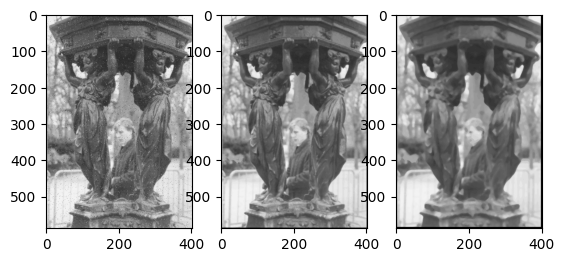

In [10]:
#  code here
img3 = cv2.imread("sta2noi2.png", cv2.IMREAD_GRAYSCALE)
# Definindo o tamanho do kernel
kernel_size = [3,7]

# Obtendo as dimensões da imagem
height, width = img3.shape

# Criando uma imagem vazia para armazenar o resultado
filtered_img_3 = np.zeros((height, width), dtype=np.uint8)
filtered_img_7 = np.zeros((height, width), dtype=np.uint8)

# Aplicando o filtro de mediana
for k in kernel_size:
    for i in range(k // 2, height - k // 2):
        for j in range(k // 2, width - k // 2):
            if  k==3:
                # Criando uma janela (kernel)
                kernel3 = img3[i - k // 2:i + k // 2 + 1, j - k // 2:j + k // 2 + 1]
                # Aplicando a mediana na janela
                filtered_img_3[i, j] = np.median(kernel3)
            else:
                # Criando uma janela (kernel)
                kernel7 = img3[i - k // 2:i + k // 2 + 1, j - k // 2:j + k // 2 + 1]
                # Aplicando a mediana na janela
                filtered_img_7[i, j] = np.median(kernel7)

# Exibindo a imagem original e a imagem filtrada
fig, ax = plt.subplots(1, 3)
ax[0].imshow(img3, cmap='gray', vmin=0, vmax=255)
ax[1].imshow(filtered_img_3, cmap='gray', vmin=0, vmax=255)
ax[2].imshow(filtered_img_7, cmap='gray', vmin=0, vmax=255)
plt.show()

4)	Aplique o filtro de Mediana para a imagem abaixo, que apresenta um ruído salt and pepper
- 3×3 filter;	7×7 filter

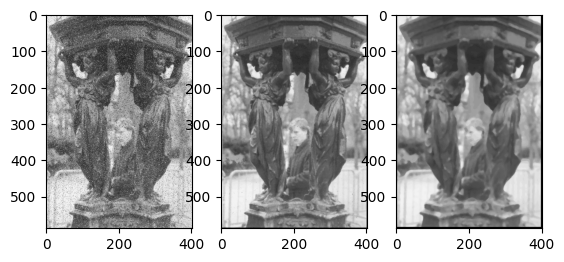

In [9]:
#  code here
img3 = cv2.imread("sta2noi1.png", cv2.IMREAD_GRAYSCALE)
# Definindo o tamanho do kernel
kernel_size = [3,7]

# Obtendo as dimensões da imagem
height, width = img3.shape

# Criando uma imagem vazia para armazenar o resultado
filtered_img_3 = np.zeros((height, width), dtype=np.uint8)
filtered_img_7 = np.zeros((height, width), dtype=np.uint8)

# Aplicando o filtro de mediana
for k in kernel_size:
    for i in range(k // 2, height - k // 2):
        for j in range(k // 2, width - k // 2):
            if  k==3:
                # Criando uma janela (kernel)
                kernel3 = img3[i - k // 2:i + k // 2 + 1, j - k // 2:j + k // 2 + 1]
                # Aplicando a mediana na janela
                filtered_img_3[i, j] = np.median(kernel3)
            else:
                # Criando uma janela (kernel)
                kernel7 = img3[i - k // 2:i + k // 2 + 1, j - k // 2:j + k // 2 + 1]
                # Aplicando a mediana na janela
                filtered_img_7[i, j] = np.median(kernel7)

# Exibindo a imagem original e a imagem filtrada
fig, ax = plt.subplots(1, 3)
ax[0].imshow(img3, cmap='gray', vmin=0, vmax=255)
ax[1].imshow(filtered_img_3, cmap='gray', vmin=0, vmax=255)
ax[2].imshow(filtered_img_7, cmap='gray', vmin=0, vmax=255)
plt.show()